# Stock Market Prediction and Forecasting Using Stacked LSTM

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the datasets

In [2]:
stock_df = pd.read_csv('NSE-TATAGLOBAL.csv')
stock_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


#### Preprocess Data


- Checking null values

In [3]:
stock_df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [4]:
stock_df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [7]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [8]:
stock_df.sort_values(by=["Date"], inplace=True, ascending=True)


- Converting the date column to datetime format is essential for several reasons when working with time series data:

- Proper Time Handling: Datetime format allows for consistent and reliable time handling. It ensures that date-related operations, such as time-based filtering, sorting, and aggregation, work correctly and produce accurate results.

- Time-Based Indexing: When the date column is in datetime format, it can be used as the index for the DataFrame. Time-based indexing is beneficial for slicing and selecting specific time periods easily.

- Time Series Plots: Datetime format enables proper time axis labeling in plots, making it easier to interpret and visualize the data over time.

- Resampling and Frequency Conversion: Datetime format is essential when performing resampling or frequency conversion operations. These operations are common in time series analysis, and they involve changing the frequency of data, such as converting daily data to monthly or weekly data.

- Date Arithmetic: Datetime format allows for date arithmetic, making it convenient to calculate time differences or perform time-based calculations.

- Handling Time Zones: Datetime format supports time zone information, which can be crucial when dealing with data from different time zones or when performing time zone conversions.

- Interoperability: Datetime format is widely used in various Python libraries and tools for time series analysis, such as pandas, NumPy, Matplotlib, and more. Converting to datetime format ensures better interoperability with these libraries.

- Overall, using the datetime format for the date column in time series data ensures that the data is correctly interpreted and handled with respect to time, enabling more accurate analysis and modeling.

In [9]:
stock_df.Date.head(50)

2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
2029   2010-07-28
2028   2010-07-29
2027   2010-07-30
2026   2010-08-02
2025   2010-08-03
2024   2010-08-04
2023   2010-08-05
2022   2010-08-06
2021   2010-08-09
2020   2010-08-10
2019   2010-08-11
2018   2010-08-12
2017   2010-08-13
2016   2010-08-16
2015   2010-08-17
2014   2010-08-18
2013   2010-08-19
2012   2010-08-20
2011   2010-08-23
2010   2010-08-24
2009   2010-08-25
2008   2010-08-26
2007   2010-08-27
2006   2010-08-30
2005   2010-08-31
2004   2010-09-01
2003   2010-09-02
2002   2010-09-03
2001   2010-09-06
2000   2010-09-07
1999   2010-09-08
1998   2010-09-09
1997   2010-09-13
1996   2010-09-14
1995   2010-09-15
1994   2010-09-16
1993   2010-09-17
1992   2010-09-20
1991   2010-09-21
1990   2010-09-22
1989   2010-09-23
1988   2010-09-24
1987   2010-09-27
1986   2010-09-28
1985   2010-09-29
Name: Date, dtype: datetime64[ns]

In [10]:
stock_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [11]:
stock_df.reset_index(inplace=True)

In [12]:
stock_df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Data Visualization
- Plotting the graph for the Date and Close

- plt.figure(figsize=(10, 7))
- plt.plot('Date', 'Close', data=stock_df, label='Close Price', color='blue')
- plt.xlabel('Date')
- plt.ylabel('Close Price')
- plt.title('Stock Close Price Over Time')
- plt.legend()
- plt.show()

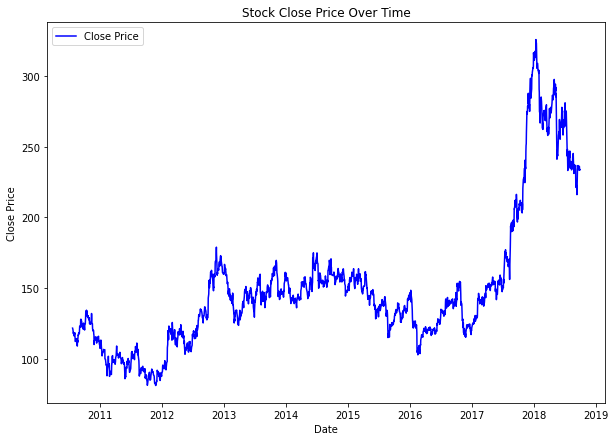

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(stock_df['Date'], stock_df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.show()

In [14]:
close_stock_df = stock_df['Close']
close_stock_df

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

#### Feature Scaling(MinMax Scaler)
- Preprocessing step when working with neural networks like LSTM to improve convergence(When features are on the same scale, the optimizer can efficiently update the model's weights, leading to faster convergence to an optimal solution.), stability, and overall model performance.

- Efficient Numerical Computations: Normalizing features to a range between 0 and 1 or -1 and 1 can improve numerical stability in computations, especially when using activation functions like sigmoid or tanh in LSTMs.

- When the input features have different ranges, some features might dominate the learning process, while others might have a negligible impact. By normalizing the features to a common scale, each feature contributes equally to the learning process, preventing one feature from overpowering others.

- scaler = MinMaxScaler(feature_range=(0,1)) 
- close_stock_df = scaler.fit_transform(np.array(close_stock_df).reshape(-1, 1))
- close_stock_df

- reshape(-1, 1) operation converts the 1-dimensional array into a 2-dimensional array (specifically, a column vector). This is necessary because scikit-learn's MinMaxScaler expects a 2-dimensional array as input.

In [15]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object and specify the feature range (0 to 1)
scaler = MinMaxScaler(feature_range=(0,1)) 
# Convert the 'Close' prices to a 2-dimensional array for MinMaxScaler
close_stock_df = np.array(close_stock_df).reshape(-1, 1)
# Apply the MinMaxScaler to normalize the 'Close' prices
close_stock_df = scaler.fit_transform(close_stock_df)
close_stock_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

#### Splitting the dataset

In [16]:
# Calculate the size of the training set (70% of the data)
train_size = int(len(close_stock_df) * 0.7)

# Calculate the size of the testing set (30% of the data)
test_size = len(close_stock_df) - train_size

# Split the data into training and testing sets
# 'train_data' will contain the first 'train_size' rows of 'close_stock_df'
train_data = close_stock_df[0:train_size, :]

# 'test_data' will contain the remaining rows after the training set
# Specifically, it will contain the last 'test_size' rows of 'close_stock_df' in a 2D column vector format
test_data = close_stock_df[train_size:len(close_stock_df), :1]


- close_stock_df[0:train_size, :] selects the rows from index 0 to train_size-1 (exclusive) of close_stock_df. The : in the second position indicates that we want to include all columns, effectively selecting all columns for the selected rows.

- train_data will be a 2-dimensional array containing the normalized closing prices for the training period. It includes the first train_size rows and all columns from close_stock_df.

- After this slicing, you can use train_data to train your LSTM or any other time series model. It contains the normalized closing prices for the training period, which you can use to build and train the model.

- close_stock_df[train_size:len(close_stock_df), :1] is used to slice the data and create the testing set (test_data).

-  The colon : after train_size indicates that we want to select all rows starting from the train_size index and going up to the end of the array (last row). This creates a new 2-dimensional array that includes all rows from the train_size index to the end of the DataFrame, representing the testing set.

- ':1'  The colon : before 1 is used to specify the slicing for columns. In this case, it means we want to include only the first column of the 2-dimensional array obtained from the previous step. The result will be a 2-dimensional column vector.

- To summarize, after this slicing, test_data will be a 2-dimensional array (column vector) containing the normalized closing prices for the testing period. It includes all rows from index train_size to the last row of close_stock_df, and only the first column (representing the "Close" prices) is included. This testing set can be used to evaluate the performance of the LSTM or any other time series model on unseen data.
  


In [17]:
train_data.shape

(1424, 1)

In [18]:
test_data.shape

(611, 1)

- For this LSTM, we are using previous closing price as the input of the data and using n number of previous price 'X' we give out put to n+1 closing price as the 'Y' of the data

In [21]:
# Create input and target sequences for the LSTM model
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


- This function is used to create input sequences and target labels for time series forecasting using an LSTM or any other machine learning model.

- dataset: This is the input time series data, typically represented as a 2-dimensional numpy array. The function expects that the time series data is organized such that the time steps are in the rows and features (if any) are in the columns.

- time_step: This parameter determines the number of time steps to consider for each input sequence. It's an optional parameter with a default value of 1, meaning the function will use adjacent time steps to create input sequences.

- Here's how the function works:

- dataX, dataY: These are empty lists that will be used to store the input sequences (dataX) and their corresponding target labels (dataY).

- for i in range(len(dataset) - time_step - 1): This loop iterates over the time steps in the dataset, excluding the last time_step + 1 time steps. The reason for excluding the last time steps is that we need enough data to create a complete input sequence with time_step time steps and a corresponding target label.

- a = dataset[i:(i + time_step), 0]: In each iteration of the loop, a subsequence of time_step time steps is extracted from the dataset starting at index i. The dataset[i:(i + time_step), 0] syntax selects the first column (column index 0) of the subsequence. This a will be an input sequence of length time_step.

- dataX.append(a): The input sequence a is added to the list dataX, which collects all the input sequences.

- dataY.append(dataset[i + time_step, 0]): The corresponding target label is extracted from the dataset at the time step immediately following the input sequence. This target label represents the value to be predicted by the model.

- After the loop, the function returns two numpy arrays: dataX (containing input sequences) and dataY (containing target labels).

- Overall, this function takes a time series dataset and a specified time_step to create input sequences and target labels. These sequences and labels can be used to train a time series forecasting model such as an LSTM. The number of input sequences created depends on the length of the dataset and the time_step parameter.

In [22]:
# Set the value of 'time_step'
time_step = 100

# Create training sequences and target labels using 'train_data'
X_train, y_train = create_dataset(train_data, time_step)

# Create testing sequences and target labels using 'test_data'
X_test, y_test = create_dataset(test_data, time_step)


In [23]:

print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [24]:
print(X_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

#### Reshaping of dataset
- We always have to give a 3-dimensional array as an input to LSTM network, where the first-dimension represents the batch size, the second dimension represents the number of time-steps feeding a sequence and the third dimension represents the number of units in one input sequence

- For e.g, input shape looks like (batch_size) or sample, time_steps and sequence_length or n_features

- if X = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
- then (batch_size) or sample = 4, time_steps = 4 and sequence_length or n_features = 3


In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
X_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.14011438],
        [0.13848039],
        [0.12479575]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.13848039],
        [0.12479575],
        [0.12254902]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.12479575],
        [0.12254902],
        [0.13010621]],

       ...,

       [[0.18280229],
        [0.19178922],
        [0.19219771],
        ...,
        [0.16441993],
        [0.15236928],
        [0.15482026]],

       [[0.19178922],
        [0.19219771],
        [0.19281046],
        ...,
        [0.15236928],
        [0.15482026],
        [0.15420752]],

       [[0.19219771],
        [0.19281046],
        [0.21058007],
        ...,
        [0.15482026],
        [0.15420752],
        [0.15012255]]])

In [27]:
X_test

array([[[0.1621732 ],
        [0.15951797],
        [0.16707516],
        ...,
        [0.24775327],
        [0.24836601],
        [0.25020425]],

       [[0.15951797],
        [0.16707516],
        [0.15992647],
        ...,
        [0.24836601],
        [0.25020425],
        [0.25020425]],

       [[0.16707516],
        [0.15992647],
        [0.16053922],
        ...,
        [0.25020425],
        [0.25020425],
        [0.23999183]],

       ...,

       [[0.86519608],
        [0.84027778],
        [0.84497549],
        ...,
        [0.62888072],
        [0.62765523],
        [0.62234477]],

       [[0.84027778],
        [0.84497549],
        [0.87111928],
        ...,
        [0.62765523],
        [0.62234477],
        [0.63378268]],

       [[0.84497549],
        [0.87111928],
        [0.85273693],
        ...,
        [0.62234477],
        [0.63378268],
        [0.62622549]]])

#### Creating the stacked LSTM Model

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
#Creating the LSTM model
model=Sequential()
# Optionally, the first layer can receive an `input_shape` argument
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))

# Inner layer
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

# Output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Prediction and Checking Performance

In [31]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)


Epoch 1/60
19/19 [==============================] - 19s 437ms/step - loss: 0.0135 - val_loss: 0.0014
Epoch 2/60
19/19 [==============================] - 5s 271ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 5s 242ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 5s 267ms/step - loss: 9.6647e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 5s 279ms/step - loss: 8.6632e-04 - val_loss: 0.0013
Epoch 6/60
19/19 [==============================] - 5s 276ms/step - loss: 8.4464e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 5s 275ms/step - loss: 8.1334e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 5s 274ms/step - loss: 8.0007e-04 - val_loss: 0.0011
Epoch 9/60
19/19 [==============================] - 5s 278ms/step - loss: 7.5985e-04 - val_loss: 9.9294e-04
Epoch 10/60
19/19 [==============================] - 5s 283ms/step - lo

- X_train: The training input sequences (features) obtained from the create_dataset function. These sequences represent the past time steps used to predict the future target value.

- y_train: The corresponding training target labels obtained from the create_dataset function. These target labels represent the future time step value to be predicted by the model.

- validation_split=0.1: The validation split is a way to set aside a portion of the training data for validation during training. In this case, 10% of the training data (X_train and y_train) will be used for validation, and the remaining 90% will be used for actual training. The model will not be trained on the validation data, but its performance on this data will be monitored during training to assess generalization.

- epochs=60: The number of epochs represents how many times the model will iterate through the entire training dataset during training. One epoch means one full pass through the dataset. In this case, the model will be trained for 60 epochs.

- batch_size=64: The batch size determines how many samples are processed at once during each epoch. A smaller batch size consumes less memory but may result in slower training. A larger batch size can accelerate training but may require more memory. In this case, the batch size is set to 64.

- verbose=1: The verbosity level during training determines how much information will be displayed during each epoch. A value of 1 means to display progress bars and training information for each epoch, while 0 means training will be silent without any output.

- Once the fit method is executed, the LSTM model will be trained using the training data and validated using the validation split. The training progress and performance on the validation data will be displayed for each epoch based on the verbosity level specified. After training, the model will be ready for making predictions on unseen data.

In [32]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 64ms/step


In [33]:
train_predict = scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

- After applying inverse_transform, both train_predict and test_predict will contain the predicted 'Close' prices in their original scale, allowing for a meaningful comparison with the actual 'Close' prices. 

- This is necessary because, during training and testing, the LSTM model was fed with normalized data, and the model's predictions were made on the normalized scale. However, for practical use and visualization, the predictions need to be brought back to the original scale to interpret them in the context of actual stock prices.

#### Calculating the Performance

In [34]:
import math
from sklearn.metrics import mean_squared_error

In [35]:
math.sqrt(mean_squared_error(y_train,train_predict))

133.5570915889323

In [36]:
math.sqrt(mean_squared_error(y_test,test_predict))

202.2649211722733

#### Plotting the graph with predicted train data, test data with actual data

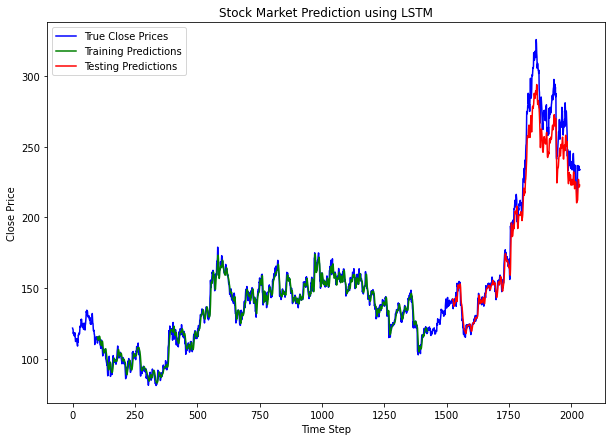

In [37]:
look_back = 100

# Initialize arrays to plot the predictions
trainPredictPlot = np.empty_like(close_stock_df)
trainPredictPlot[:, :] = np.nan
testPredictPlot = np.empty_like(close_stock_df)
testPredictPlot[:, :] = np.nan

# Fill the arrays with predictions for plotting
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(close_stock_df) - 1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(10, 7))
plt.plot(scaler.inverse_transform(close_stock_df), label='True Close Prices', color='blue')
plt.plot(trainPredictPlot, label='Training Predictions', color='green')
plt.plot(testPredictPlot, label='Testing Predictions', color='red')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.title('Stock Market Prediction using LSTM')
plt.legend()
plt.show()


#### Initialize arrays to plot the predictions
- In this part, you have initialized trainPredictPlot and testPredictPlot as numpy arrays with the same shape as close_stock_df. These arrays are filled with np.nan values, representing missing or empty data. The reason for using np.nan is to create gaps in the plots where the predictions are not available, which helps distinguish them from the true close prices.

#### Fill the arrays with predictions for plotting
- Here, you are filling trainPredictPlot and testPredictPlot with the predictions obtained from the LSTM model:

trainPredictPlot: You insert the training predictions (train_predict) into trainPredictPlot. The predictions are placed starting from the look_back index (100 time steps) up to the end of the training predictions, leaving the initial part (before look_back) as missing (represented by np.nan).

testPredictPlot: You insert the testing predictions (test_predict) into testPredictPlot. The predictions are placed starting from the index after the training predictions and look_back * 2 time steps further, up to the end of the close_stock_df array, leaving the initial part (before testing predictions) and the last point (as the testing data is shorter than the original data) as missing (represented by np.nan).

#### Plot baseline and predictions
- In this part, you create a plot to visualize the true close prices (close_stock_df) along with the training and testing predictions:

- plt.plot(scaler.inverse_transform(close_stock_df), label='True Close Prices', color='blue'): This line plots the true close prices (in their original scale) from close_stock_df against the time steps. The values are transformed back to their original scale using the inverse_transform method of the scaler object.

- plt.plot(trainPredictPlot, label='Training Predictions', color='green'): This line plots the training predictions (trainPredictPlot) against the time steps in green.

- plt.plot(testPredictPlot, label='Testing Predictions', color='red'): This line plots the testing predictions (testPredictPlot) against the time steps in red.

- The plt.xlabel, plt.ylabel, plt.title, and plt.legend functions set the labels, title, and legend for the plot.

- The resulting plot shows the true close prices in blue, the training predictions in green, and the testing predictions in red. It helps you visually assess how well the LSTM model's predictions align with the true stock prices in both the training and testing periods. The gaps in the plot represent the regions where the predictions are not available, as we filled those regions with np.nan values.



#### Prediction for next 30 days

In [38]:
len(test_data)

611

In [39]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 100)

- test_data[511:]: This part of the code slices the test_data array starting from index 511 until the end of the array. The index 511 corresponds to the position after the testing sequences (of length time_step) used during the evaluation of the LSTM model.

- .reshape(1, -1): After slicing the data, you reshape it into a 2-dimensional array using the reshape method. The first argument of reshape is set to 1, indicating that you want to have a single sample for prediction (a single input sequence). The second argument, -1, is a placeholder that automatically infers the number of columns needed based on the size of the original data. In this case, it will create a single row (sample) with as many columns as there are in the sliced data.

In [40]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [42]:
lst_output=[] #predicted 30 days output
n_steps=100
i=0
while(i<30): #for 30 days-change according to the number of days you want
    
    if(len(temp_input)>100):
        #print(temp_input)
        pred_input=np.array(temp_input[1:]) # for last 100 data
        print("{} day input {}".format(i,pred_input))
        pred_input=pred_input.reshape(1,-1)
        pred_input = pred_input.reshape((1, n_steps, 1))
        #print(x_input)
        day_output = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i,day_output))
        temp_input.extend(day_output[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(day_output.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps,1))
        day_output = model.predict(pred_input, verbose=0)
        print(day_output[0])
        temp_input.extend(day_output[0].tolist())
        print(len(temp_input))
        lst_output.extend(day_output.tolist())
        i=i+1
    

print(lst_output)

[0.5830821]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

- lst_output = []: This is an empty list that will be used to store the predicted outputs for the next 30 days.

- n_steps = 100: This variable represents the number of time steps (previous time points) used as input to make a prediction. It should be the same as the look_back value used earlier in the code.

- i = 0: This is the loop counter, initialized to 0. The loop will iterate 30 times, representing the 30 days for which you want to make predictions.

- The while loop: This loop is used to make predictions for the next 30 days. The loop starts with a condition i < 30, so it will execute 30 times. You can change this condition to make predictions for a different number of days.

- if len(temp_input) > 100:: This if statement checks if the length of temp_input is greater than 100. If it is, it means we have enough data points to create an input sequence of length 100 for prediction. If not, we use the existing data points to create a sequence.

- pred_input = np.array(temp_input[1:]): For cases where len(temp_input) > 100, this line creates the input sequence pred_input for making a prediction. It takes the last 100 data points from temp_input, excluding the first one.

- pred_input = pred_input.reshape(1, -1): This line reshapes the input sequence pred_input into a 2D array with a single row and multiple columns. The number of columns is inferred based on the size of the original data.

- pred_input = pred_input.reshape((1, n_steps, 1)): This reshapes the pred_input array into a 3D array with dimensions (1, n_steps, 1). The LSTM model expects input data in this 3D format, where the first dimension is the batch size (in this case, 1), the second dimension is the number of time steps (n_steps), and the third dimension is the number of features (in this case, 1, as we have a single feature, which is the 'Close' price).

- day_output = model.predict(pred_input, verbose=0): The model's predict method is used to make predictions based on the input sequence pred_input for the next day.

- temp_input.extend(day_output[0].tolist()): The predicted output for the next day (day_output) is added to the temp_input list, effectively updating it for the next iteration and making it ready for the next prediction.

- temp_input = temp_input[1:]: The first element of temp_input is removed to maintain the sliding window of size 100 for the next prediction.

- lst_output.extend(day_output.tolist()): The predicted output for the next day (day_output) is added to the lst_output list to store the predicted outputs for the next 30 days.

- i = i + 1: The loop counter is incremented to move to the next iteration.

- After the loop finishes, the list lst_output will contain the predicted outputs for the next 30 days (or the specified number of days). These outputs are in the form of nested lists, where each inner list represents the predicted value for a specific day. The loop repeatedly uses the most recent 100 data points as input to the the model to predict the next day's output and then extends the input sequence with the predicted output for the next iteration. This process is repeated 30 times to obtain predictions for the next 30 days.

#### Ploting last 130 days Closing Price

In [43]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [44]:
len(close_stock_df)

2035

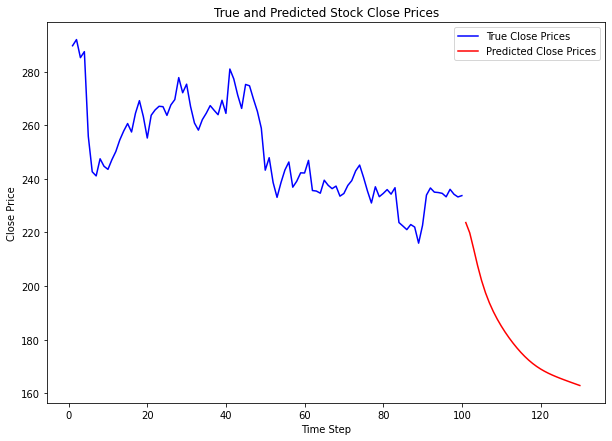

In [52]:
plt.figure(figsize=(10, 7))
plt.plot(day_new, scaler.inverse_transform(close_stock_df[1935:]), label='True Close Prices', color='blue')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Close Prices', color='red')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.title('True and Predicted Stock Close Prices')
plt.legend()
plt.show()

- day_new: This variable is an array of integers representing the time steps or indices for the last 100 days of the original close prices. The np.arange(1, 101) function generates an array of integers from 1 to 100 (both inclusive), representing the time steps for the last 100 days.

- day_pred: This variable is an array of integers representing the time steps or indices for the predicted close prices. The np.arange(101, 131) function generates an array of integers from 101 to 130 (both inclusive), representing the time steps for the next 30 days (or the specified number of days) for which we have predictions.

- scaler.inverse_transform(close_stock_df[1935:]): In this part, you are using the scaler object's inverse_transform method to convert the normalized true (original) close prices from the given data range [1935:] back to their original scale. The data from index 1935 (inclusive) to the end of close_stock_df is considered as the true close prices. Since the length of close_stock_df is 2035, this means you are plotting the true close prices from index 1935 to 2034 (a total of 100 data points).

- plt.plot(day_new, scaler.inverse_transform(close_stock_df[1935:]), label='True Close Prices', color='blue'): This line plots the true (original) close prices against the corresponding time steps (day_new) in blue. The label argument provides a label for this line, which will be used later in the legend.

- plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Close Prices', color='red'): This line plots the predicted close prices against the corresponding time steps (day_pred) in red. The label argument provides a label for this line, which will be used later in the legend.




#### Appending in a list is done to make continuous graph

In [46]:
df3=close_stock_df.tolist()
#adding specified list of predicted 30 days output to the end of last 100 days output
df3.extend(lst_output)

- df3 is a Python list that initially contains the true (original) close prices for the last 100 days from the close_stock_df dataset. The list is then extended by appending the predicted 30 days' output (lst_output) to the end. This extension is performed to create a continuous graph that shows the true close prices for the last 100 days followed by the predicted close prices for the next 30 days.

- close_stock_df.tolist(): This converts the Pandas DataFrame close_stock_df (which contains the true close prices) into a Python list. The tolist() method is used to convert the DataFrame's column into a list.

In [47]:
print(len(df3))

2065


2035 + 30 new prdicted = 2065

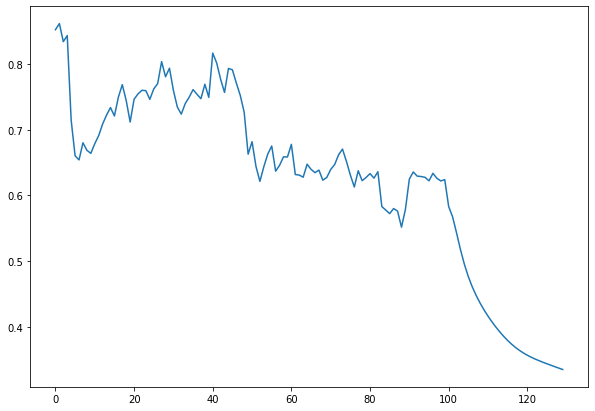

In [48]:
plt.figure(figsize=(10,7))
plt.plot(df3[1935:]) #latest 100 days output

- df3[1935:]: This part of the code slices the df3 list to extract the data for the last 100 days (or more, depending on the length of df3). It starts from index 1935 (inclusive) to the end of the list. As previously mentioned, df3 is a continuous list containing both the true close prices for the last 100 days and the predicted close prices for the next 30 days (or the specified number of days). Therefore, by using the slicing notation [1935:], you are selecting the elements from index 1935 to the end of the list, which corresponds to the latest 100 days' output.

#### Plotting the graph with predicted 30 days output

In [49]:
df3=scaler.inverse_transform(df3).tolist() #undoing scaling of df3

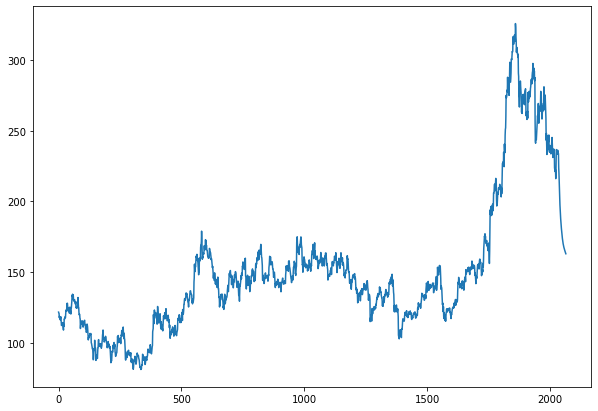

In [50]:
plt.figure(figsize=(10,7))
plt.plot(df3)

- In the provided code, plotting the entire time series of the combined data, which includes both the true (original) close prices for the last 100 days and the predicted close prices for the next 30 days (or the specified number of days)

- scaler.inverse_transform(df3): This line uses the scaler object's inverse_transform method to convert the scaled data in df3 back to its original scale. Recall that df3 contains the true close prices for the last 100 days followed by the predicted close prices for the next 30 days (or the specified number of days). By applying inverse_transform, the scaled values are reverted to their original scale.

- tolist(): After undoing the scaling, the result is converted back to a Python list. This ensures that the data is in a list format, ready for plotting.

- df3: This variable now represents the Python list containing the entire time series with both the true (original) close prices for the last 100 days and the predicted close prices for the next 30 days (or the specified number of days).

